In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## G-PCC

In [5]:
csvdir = 'comparison_vcn/gpcc_vcn_data110.csv'
df = pd.read_csv(csvdir).mean()

In [6]:
num_rates = 4
bpp_gpcc = np.array([df['R'+str(idx)+'_bpp'] for idx in range(num_rates)])[::-1]
psnr_gpcc = np.array([df['R'+str(idx)+'_psnr'] for idx in range(num_rates)])[::-1]
print(bpp_gpcc, '\n', psnr_gpcc)

[0.46913169 0.91414553 2.04612268 5.33076537] 
 [53.55643909 57.99108273 63.90687545 72.43462545]


In [7]:
print('time enc:',
    np.array([df['R'+str(idx)+'_enc_time_wall'] for idx in range(num_rates)]).round(3)[::-1])
print('time dec:',
    np.array([df['R'+str(idx)+'_dec_time_wall'] for idx in range(num_rates)]).round(3)[::-1])

time enc: [0.539 0.62  0.817 1.281]
time dec: [0.09  0.143 0.261 0.533]


## VCN & OctSqueeze

In [8]:
# bpp_vcn_false = [0.389742, 0.955612, 2.089286, 4.497174]
bpp_vcn = [0.453, 1.103, 2.373, 4.957]
psnr_vcn_woCRM = [54.70, 60.66, 66.69, 72.71]
psnr_vcn = [55.998051, 61.929028, 68.060326, 74.237312]

# bpp_octsqze_false =  [0.1774, 0.4796, 1.2024, 2.5821]
bpp_octsqze = [0.194832, 0.533813, 1.315514, 2.841746]
psnr_octsqze = [48.60, 54.70, 60.66, 66.69]

## Ours

In [10]:
# csvdir = 'results/sparse_lossy/ours_sparse_vcn_data110.csv'
csvdir = 'comparison_vcn/ours_sparse_vcn_data110.csv'
df = pd.read_csv(csvdir).mean()

num_rates = 4
bpp_ours = np.array([df['R'+str(idx)+'_bpp'] for idx in range(num_rates)])[::-1]
psnr_ours = np.array([df['R'+str(idx)+'_psnr'] for idx in range(num_rates)])[::-1]
print(bpp_ours, '\n', psnr_ours)

[0.41248182 0.97927273 2.08696364 3.79505455] 
 [54.44670091 60.49645909 66.50920727 72.53121455]


In [11]:
print('time enc:', np.array([df['R'+str(idx)+'_enc_time'] for idx in range(num_rates)])[::-1])
print('time dec:', np.array([df['R'+str(idx)+'_dec_time'] for idx in range(num_rates)])[::-1])

time enc: [0.73757273 0.90653636 1.14165455 1.42559091]
time dec: [0.58769091 0.74809091 0.96419091 1.23603636]


In [12]:
# df

In [13]:
csvdir = 'comparison_vcn/ours_sparse_vcn_offset_data110.csv'
df = pd.read_csv(csvdir).mean()
num_rates = 4
bpp_ours_offset = np.array([df['R'+str(idx)+'_bpp'] for idx in range(num_rates)])[::-1]
psnr_ours_offset = np.array([df['R'+str(idx)+'_psnr'] for idx in range(num_rates)])[::-1]
print(bpp_ours_offset, '\n', psnr_ours_offset)

[0.41248182 0.97927273 2.08696364 3.79505455] 
 [55.82993818 61.88368545 68.00149455 73.92273091]


In [14]:
print('time enc:', np.array([df['R'+str(idx)+'_enc_time'] for idx in range(num_rates)])[::-1])
print('time dec:', np.array([df['R'+str(idx)+'_dec_time'] for idx in range(num_rates)])[::-1])

time enc: [0.74073636 0.92268182 1.15042727 1.43557273]
time dec: [0.6344     0.82813636 1.06164545 1.31935455]


In [15]:
import sys
sys.path.append('../')
from extension.bjontegaard_metric import BD_RATE

In [17]:
bdrate_octsqze_woCRM = BD_RATE(bpp_gpcc, psnr_gpcc, bpp_octsqze, psnr_octsqze)
bdrate_vcn_woCRM =  BD_RATE(bpp_gpcc, psnr_gpcc, bpp_vcn, psnr_vcn_woCRM)
bdrate_ours_woCRM = BD_RATE(bpp_gpcc, psnr_gpcc, bpp_ours, psnr_ours)
print(bdrate_octsqze_woCRM, bdrate_vcn_woCRM, bdrate_ours_woCRM)

-2.081447021604921 -16.729901753005315 -25.621464988061003


In [18]:
bdrate_vcn =  BD_RATE(bpp_gpcc, psnr_gpcc, bpp_vcn, psnr_vcn)
bdrate_ours = BD_RATE(bpp_gpcc, psnr_gpcc, bpp_ours_offset, psnr_ours_offset)
print(bdrate_vcn, bdrate_ours)

-29.969754559221006 -37.73934777687944


In [19]:
bdrate_ours_vs_octsquze = BD_RATE(bpp_octsqze, psnr_octsqze, bpp_ours, psnr_ours)
print(bdrate_ours_vs_octsquze)

-23.346171702651976


In [20]:
bdrate_ours_vs_vcn = BD_RATE(bpp_vcn, psnr_vcn_woCRM, bpp_ours, psnr_ours)
print(bdrate_ours_vs_vcn)

-10.777212795445323


In [21]:
bdrate_ours_vs_vcn2 = BD_RATE(bpp_vcn, psnr_vcn, bpp_ours, psnr_ours_offset)
print(bdrate_ours_vs_vcn2)

-11.739714806661494


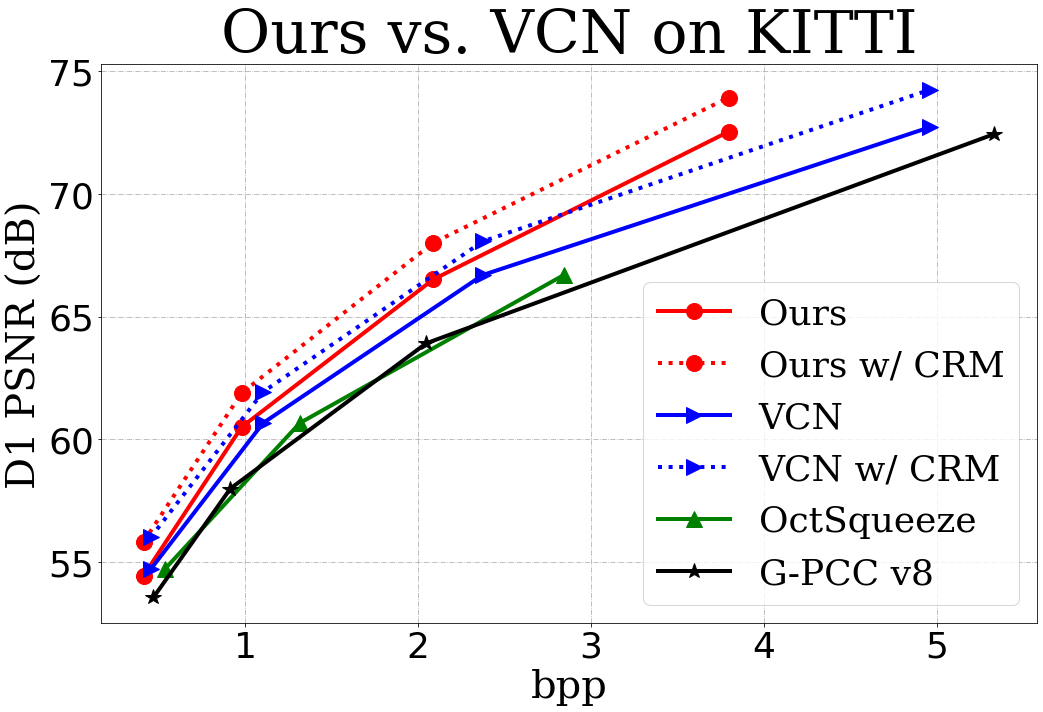

In [22]:
fig, ax = plt.subplots(figsize=(7.3*2,5*2))
# VCN

# Ours
plt.plot(bpp_ours, psnr_ours, label='Ours',color='red',marker='o', 
         linewidth=4,markersize=16)
plt.plot(bpp_ours_offset, psnr_ours_offset, label='Ours w/ CRM',color='red',marker='o', 
         linestyle=':',linewidth=4,markersize=16)

plt.plot(bpp_vcn, psnr_vcn_woCRM, label='VCN', color='blue',marker='>', 
         linewidth=4,markersize=16)
plt.plot(bpp_vcn, psnr_vcn, label='VCN w/ CRM', color='blue', marker='>',  
         linestyle=':',linewidth=4,markersize=16)

plt.plot(bpp_octsqze[1:], psnr_octsqze[1:], label='OctSqueeze', color='green', marker='^',  
         linewidth=4,markersize=16)

# G-PCC
plt.plot(bpp_gpcc, psnr_gpcc, label='G-PCC v8', color='black',marker='*', 
         linewidth=4,markersize=16)
# plt.plot(bpp_gpcc1, psnr_gpcc1, label='G-PCC v14', color='red',marker='*', 
#          linewidth=4,markersize=16)

ax.locator_params(axis='x', nbins=8)
ax.locator_params(axis='y', nbins=8)
plt.tick_params(labelsize=36)
plt.xlabel("bpp", fontdict={'family':'serif', 'weight':'normal','size':40})
plt.ylabel("D1 PSNR (dB)", fontdict={'family':'serif', 'weight':'normal','size':40})

plt.title('Ours vs. VCN on KITTI', 
          fontdict={'family':'serif', 'weight':'normal','size':60})
plt.grid(ls='-.')
plt.legend(loc='lower right', ncol=1,
           prop={'family':'serif', 'weight':'normal','size':36})
fig.tight_layout()
os.makedirs('figs', exist_ok=True)
fig.savefig(os.path.join('figs', 'ours_vs_vcn.pdf'))